In [1]:
import pandas as pd
from datetime import datetime
# 导入数据源
data=pd.read_csv("order-14.3.csv",parse_dates=["成交时间"],encoding='gbk')
data.head()
# data.shape

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759


In [2]:
# 哪些类别的商品比较畅销
# ascending=False 降序
data.groupby("类别ID")["销量"].sum().reset_index().sort_values(by="销量",ascending=False).head(10)

,类别ID,销量
240,922000003,425.328
239,922000002,206.424
251,923000006,190.294
216,915030104,175.059
238,922000001,121.355
367,960000000,121.000
234,920090000,111.565
249,923000002,91.847
237,922000000,86.395
247,923000000,85.845


In [3]:
# 哪些商品比较畅销
pd.pivot_table(data,index="商品ID",values="销量",aggfunc="sum").reset_index().sort_values(by="销量",ascending=False).head(10)

,商品ID,销量
8,29989059,391.549
18,29989072,102.876
469,30022232,101.000
523,30031960,99.998
57,29989157,72.453
476,30023041,64.416
505,30026255,62.375
7,29989058,56.052
510,30027007,48.757
903,30171264,45.000


In [4]:
# 不同门店的销售额占比
data["销售额"]=data["销量"]*data["单价"]
data.groupby("门店编号")["销售额"].sum()


门店编号
CDLG    10908.82612
CDNL     8059.47867
CDXL     9981.76166
Name: 销售额, dtype: float64

In [5]:
data.groupby("门店编号")["销售额"].sum()/data["销售额"].sum()

门店编号
CDLG    0.376815
CDNL    0.278392
CDXL    0.344792
Name: 销售额, dtype: float64

<Axes: ylabel='销售额'>

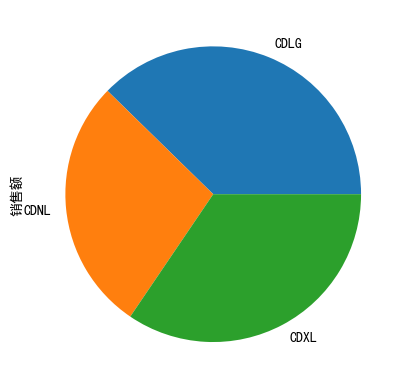

In [6]:
import matplotlib as mpl

mpl.rcParams["font.family"]="SimHei"
mpl.rcParams["axes.unicode_minus"]=False
(data.groupby("门店编号")["销售额"].sum()/data["销售额"].sum()).plot.pie()

<Axes: xlabel='小时'>

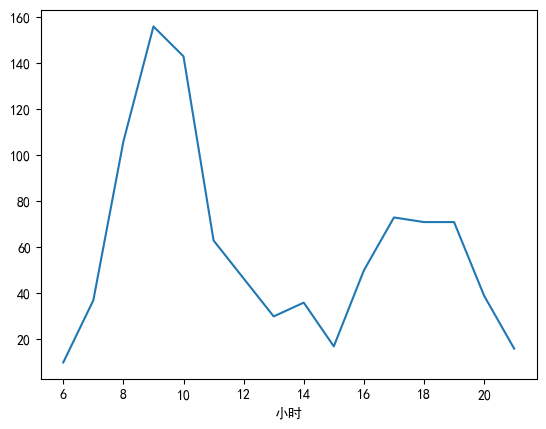

In [7]:
# 哪个时间段是超市的客流高封期
# 利用自定义时间格式函数strftime提取小时数
data["小时"]=data["成交时间"].map(lambda x:int(x.strftime("%H")))
# 对小时和订单去重
traffic=data[["小时","订单ID"]].drop_duplicates()
# 求每小时的客流量
traffic.groupby("小时")["订单ID"].count().plot()